In [1]:
# Câu a/
from tensorflow.keras.datasets import mnist

# Đọc dữ liệu train và test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Nguyễn Lê Gia Mỹ - 6351071046")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Nguyễn Lê Gia Mỹ - 6351071046


In [13]:
# Câu b/
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("Nguyễn Lê Gia Mỹ - 6351071046")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Nguyễn Lê Gia Mỹ - 6351071046


In [2]:
# Câu c/
train_images = train_images / 255.0
test_images = test_images / 255.0
print("Nguyễn Lê Gia Mỹ - 6351071046")

Nguyễn Lê Gia Mỹ - 6351071046


In [3]:
# Câu d/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model
print("Nguyễn Lê Gia Mỹ - 6351071046")

Nguyễn Lê Gia Mỹ - 6351071046


In [4]:
# Câu e/
import numpy as np
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

models = []
accuracy_per_fold = []
loss_per_fold = []

fold_no = 1

for train_idx, val_idx in kf.split(train_images):
    print(f"\n===== FOLD {fold_no} =====")

    X_train_fold = train_images[train_idx]
    y_train_fold = train_labels[train_idx]
    X_val_fold = train_images[val_idx]
    y_val_fold = train_labels[val_idx]

    model = create_model()

    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=5,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )

    # Đánh giá fold
    loss, acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss:.4f} - Accuracy: {acc:.4f}")

    accuracy_per_fold.append(acc)
    loss_per_fold.append(loss)
    models.append(model)

    fold_no += 1
print("Nguyễn Lê Gia Mỹ - 6351071046")


===== FOLD 1 =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Loss: 0.0767 - Accuracy: 0.9777

===== FOLD 2 =====
Fold 2 - Loss: 0.0851 - Accuracy: 0.9743

===== FOLD 3 =====
Fold 3 - Loss: 0.0865 - Accuracy: 0.9753

===== FOLD 4 =====
Fold 4 - Loss: 0.0807 - Accuracy: 0.9753

===== FOLD 5 =====
Fold 5 - Loss: 0.0996 - Accuracy: 0.9708

===== FOLD 6 =====
Fold 6 - Loss: 0.0716 - Accuracy: 0.9775

===== FOLD 7 =====
Fold 7 - Loss: 0.0898 - Accuracy: 0.9727

===== FOLD 8 =====
Fold 8 - Loss: 0.0826 - Accuracy: 0.9747

===== FOLD 9 =====
Fold 9 - Loss: 0.0895 - Accuracy: 0.9720

===== FOLD 10 =====
Fold 10 - Loss: 0.0824 - Accuracy: 0.9755
Nguyễn Lê Gia Mỹ - 6351071046


In [6]:
# Câu f/
print("Mean accuracy:", np.mean(accuracy_per_fold))
print("Std accuracy:", np.std(accuracy_per_fold))
print("Mean loss:", np.mean(loss_per_fold))
print("Std loss:", np.std(loss_per_fold))
print("Nguyễn Lê Gia Mỹ - 6351071046")

Mean accuracy: 0.9745833396911621
Std accuracy: 0.002108511484771023
Mean loss: 0.08444441333413125
Std loss: 0.007326208302932629
Nguyễn Lê Gia Mỹ - 6351071046


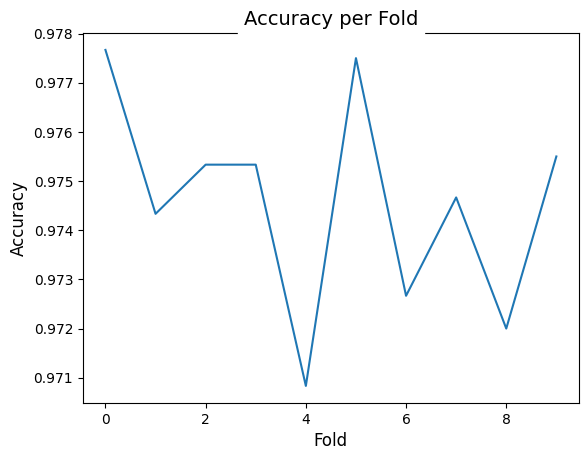

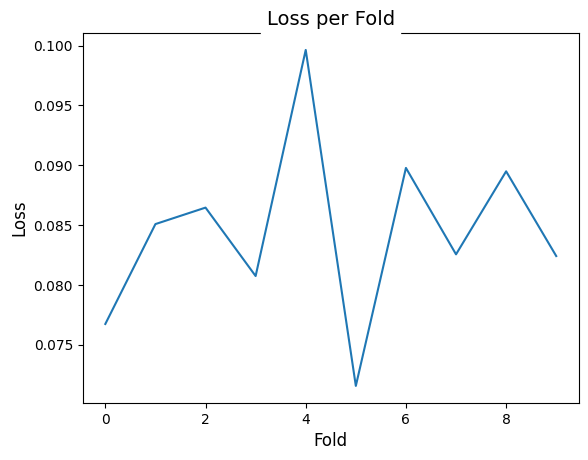

Nguyễn Lê Gia Mỹ - 6351071046


In [7]:
# Câu g/
import matplotlib.pyplot as plt

plt.plot(accuracy_per_fold)
plt.title("Accuracy per Fold", fontsize=14, color='black', backgroundcolor='white')
plt.xlabel("Fold", fontsize=12, color='black')
plt.ylabel("Accuracy", fontsize=12, color='black')
plt.show()

plt.plot(loss_per_fold)
plt.title("Loss per Fold", fontsize=14, color='black', backgroundcolor='white')
plt.xlabel("Fold", fontsize=12, color='black')
plt.ylabel("Loss", fontsize=12, color='black')
plt.show()

print("Nguyễn Lê Gia Mỹ - 6351071046")


In [8]:
# Câu h/
best_index = np.argmax(accuracy_per_fold)
best_model = models[best_index]

print("Best model is from fold:", best_index + 1)
print("Nguyễn Lê Gia Mỹ - 6351071046")


Best model is from fold: 1
Nguyễn Lê Gia Mỹ - 6351071046


In [9]:
# Câu i/
test_pred = np.argmax(best_model.predict(test_images), axis=1)

from sklearn.metrics import accuracy_score
acc_test = accuracy_score(test_labels, test_pred)

print("Test Accuracy:", acc_test)
print("Nguyễn Lê Gia Mỹ - 6351071046")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.9753
Nguyễn Lê Gia Mỹ - 6351071046


In [10]:
# Câu j/
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_pred))
print("Nguyễn Lê Gia Mỹ - 6351071046")


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.94      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Nguyễn Lê Gia Mỹ - 6351071046


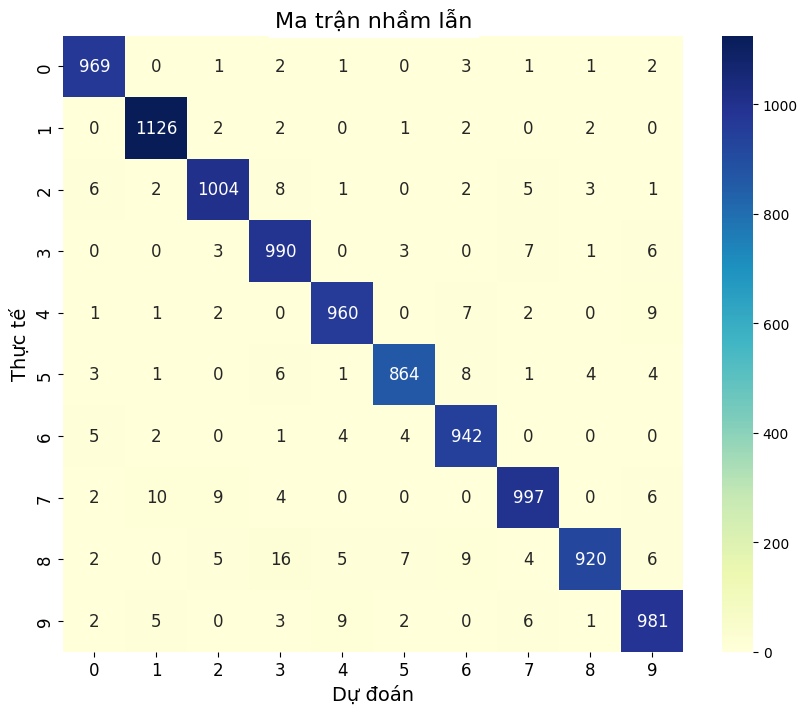

Nguyễn Lê Gia Mỹ - 6351071046


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, test_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', annot_kws={'size': 12})
plt.title("Ma trận nhầm lẫn", fontsize=16, color='black', backgroundcolor='white')
plt.xlabel("Dự đoán", fontsize=14, color='black')
plt.ylabel("Thực tế", fontsize=14, color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print("Nguyễn Lê Gia Mỹ - 6351071046")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


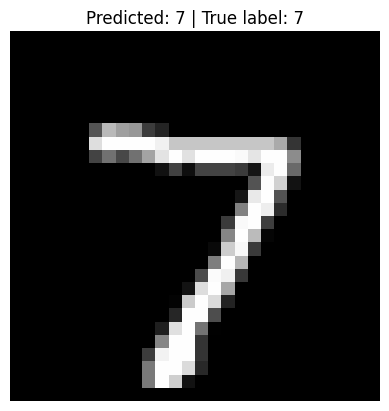

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


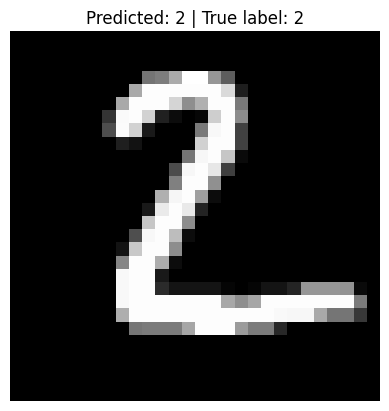

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


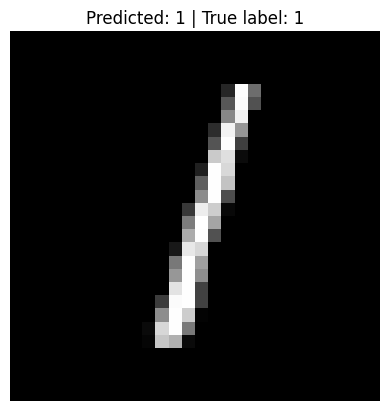

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


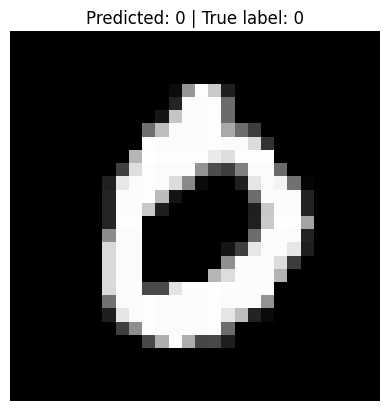

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


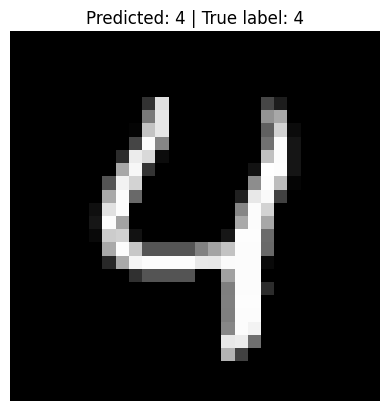

Nguyễn Lê Gia Mỹ - 6351071046


In [12]:
# Câu l/
for i in range(5):
    image = test_images[i]
    pred = np.argmax(best_model.predict(np.expand_dims(image, axis=0)))

    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {pred} | True label: {test_labels[i]}")
    plt.axis('off')
    plt.show()
print("Nguyễn Lê Gia Mỹ - 6351071046")
